2024-06-21 15:10:02.660536: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-21 15:10:02.943453: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-21 15:10:02.944630: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 15:10:04.069212: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/10


2024-06-21 15:10:06.527372: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


300/300 [==============================] - 24s 77ms/step - loss: 0.2622 - accuracy: 0.9237 - val_loss: 0.0625 - val_accuracy: 0.9811
Epoch 2/10
300/300 [==============================] - 23s 78ms/step - loss: 0.0627 - accuracy: 0.9803 - val_loss: 0.0536 - val_accuracy: 0.9828
Epoch 3/10
300/300 [==============================] - 21s 68ms/step - loss: 0.0463 - accuracy: 0.9862 - val_loss: 0.0412 - val_accuracy: 0.9870
Epoch 4/10
300/300 [==============================] - 26s 87ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0303 - val_accuracy: 0.9892
Epoch 5/10
300/300 [==============================] - 24s 79ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0317 - val_accuracy: 0.9889
Epoch 6/10
300/300 [==============================] - 25s 85ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0326 - val_accuracy: 0.9895
Epoch 7/10
300/300 [==============================] - 24s 80ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0351 - val_accuracy: 0.9880
Epo

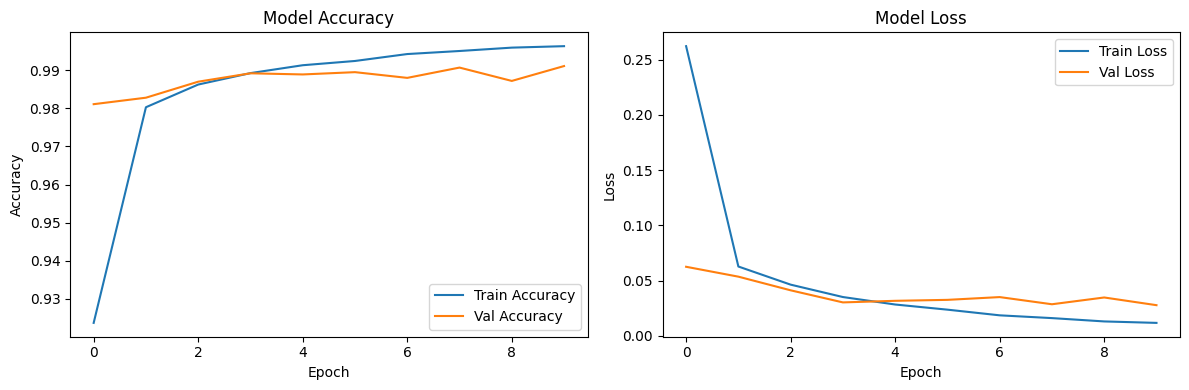

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to fit the model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 2. Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 3. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Train the model and store training history
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

# 5. Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 6. Plot the loss and accuracy
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
